## SC4061 Assignment 1

### 2.1 Contrast Stretching

#### Part a & b: Load Image, Convert to Greyscale & Display Image

Grayscale Image shape: (320, 443), Data type: uint8


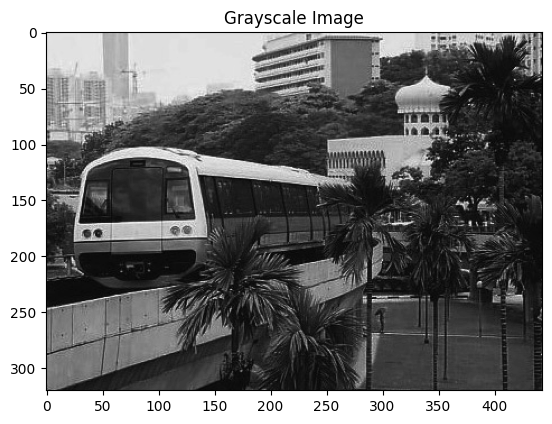

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (assuming it's in the same folder as your script)
Pc = cv2.imread('mrt-train.jpg')

# Convert the image to grayscale
P = cv2.cvtColor(Pc, cv2.COLOR_BGR2GRAY)

# Display the shape and data type of the grayscale image
print(f"Grayscale Image shape: {P.shape}, Data type: {P.dtype}")

# Display the grayscale image
plt.imshow(P, cmap='gray')
plt.title('Grayscale Image')
plt.show()

#### Part c: Check for Minimum and Maximum Intensities

In [18]:
# Part c: Check the minimum and maximum intensities
min_val = np.min(P)
max_val = np.max(P)
print(f"Min intensity: {min_val}, Max intensity: {max_val}")


Min intensity: 13, Max intensity: 204


#### Part d: Perform Contrast Stretching (Two Lines)

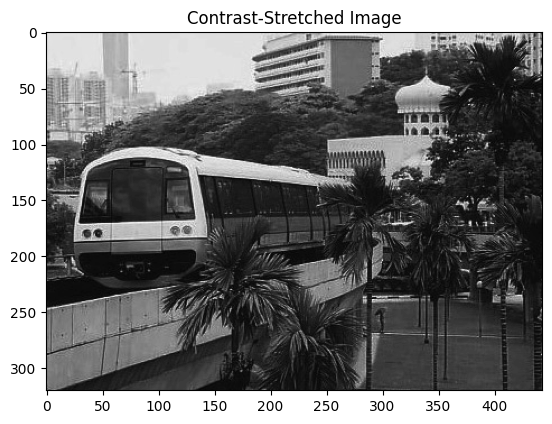

In [20]:
# Part d: Perform dynamic contrast stretching
P2 = (P - np.min(P)) * (255.0 / (np.max(P) - np.min(P)))  # Stretch the contrast
P2 = P2.astype(np.uint8)  # Convert the result back to uint8 for proper display

# Display the contrast-stretched image
plt.imshow(P2, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.show()


#### Part e: Redisplay the Image with Correct Display Handling

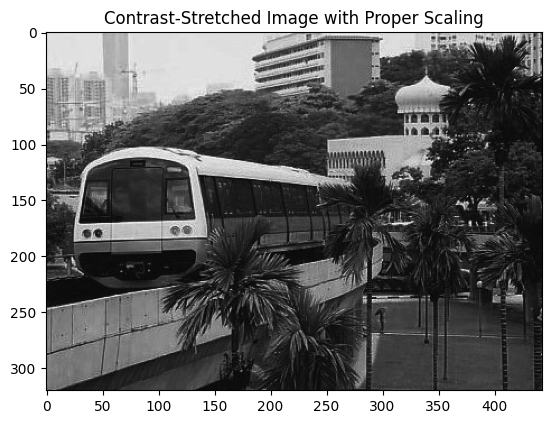

In [21]:
# Part e: Redisplay the contrast-stretched image with automatic scaling
plt.imshow(P2, cmap='gray', vmin=0, vmax=255)  # vmin and vmax ensure proper scaling
plt.title('Contrast-Stretched Image with Proper Scaling')
plt.show()

In [23]:
print(f"Original grayscale image min: {np.min(P)}, max: {np.max(P)}")
print(f"Contrast-stretched image min: {np.min(P2)}, max: {np.max(P2)}")

Original grayscale image min: 13, max: 204
Contrast-stretched image min: 0, max: 254


### 2.2 Histogram Equalization
#### Part a: Display the Image Intensity Histogram with 10 and 256 Bins

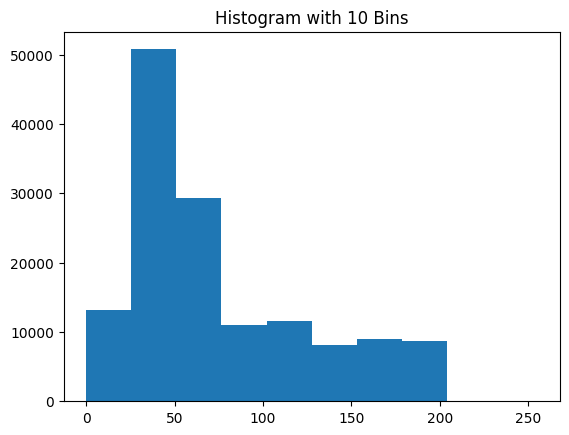

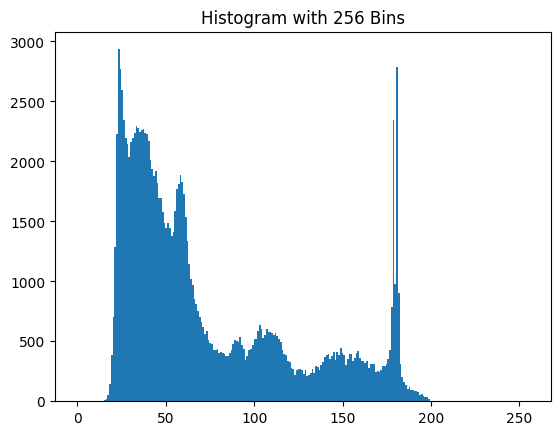

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image (P from previous steps)
P = cv2.imread('mrt-train.jpg', cv2.IMREAD_GRAYSCALE)

# Part a: Display the histogram with 10 bins
plt.figure()
plt.hist(P.ravel(), bins=10, range=[0, 255])
plt.title('Histogram with 10 Bins')
plt.show()

# Display the histogram with 256 bins
plt.figure()
plt.hist(P.ravel(), bins=256, range=[0, 255])
plt.title('Histogram with 256 Bins')
plt.show()


What are the differences between the histograms with 10 bins and 256 bins?


The histogram with 10 bins is more generalized and easier to interpret for quick analysis but loses details.
The histogram with 256 bins shows a more precise distribution of pixel intensities.

#### Part b: Perform Histogram Equalization

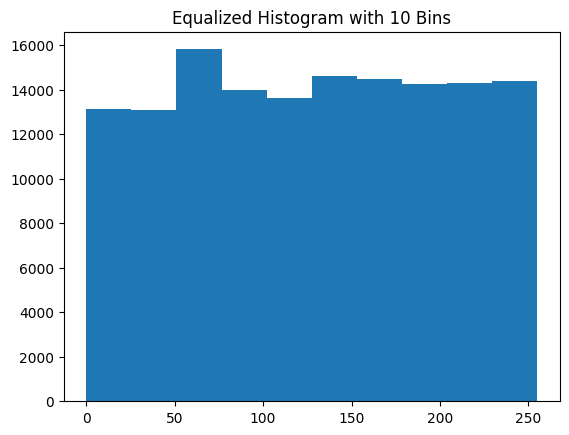

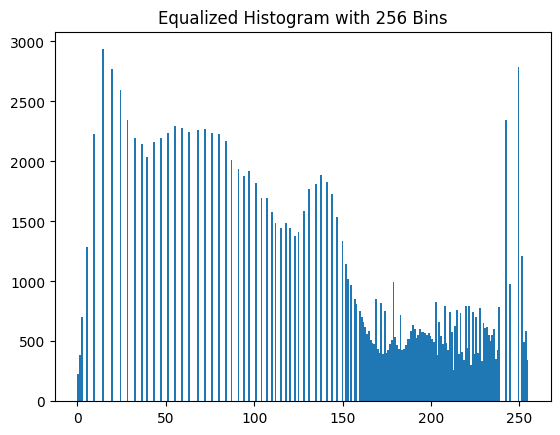

In [31]:
# Part b: Perform histogram equalization
P3 = cv2.equalizeHist(P)

# Display the histograms for the equalized image with 10 and 256 bins
plt.figure()
plt.hist(P3.ravel(), bins=10, range=[0, 255])
plt.title('Equalized Histogram with 10 Bins')
plt.show()

plt.figure()
plt.hist(P3.ravel(), bins=256, range=[0, 255])
plt.title('Equalized Histogram with 256 Bins')
plt.show()


Are the histograms equalized? What are the similarities and differences between the histograms?

Yes, the equalized histograms should show a more even distribution of pixel intensities compared to the original. The pixel intensities are stretched to use the full range (0-255).

10 Bins vs. 256 Bins: With 256 bins, the intensity values are more spread out after equalization. With 10 bins, the general distribution will look more uniform compared to the original.

#### Part c: Rerun the Histogram Equalization on P3

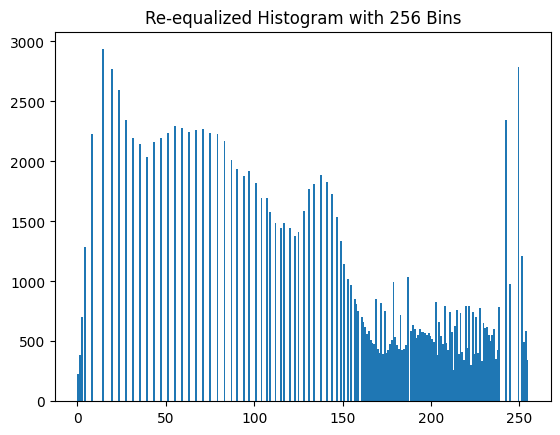

In [32]:
# Part c: Rerun histogram equalization on the already equalized image
P3 = cv2.equalizeHist(P3)

# Display the histogram for the re-equalized image with 256 bins
plt.figure()
plt.hist(P3.ravel(), bins=256, range=[0, 255])
plt.title('Re-equalized Histogram with 256 Bins')
plt.show()

Question: Does the histogram become more uniform? Why?

When histogram equalization is applied again to the equalized image (P3), the pixel values remain unchanged because they have already been redistributed. Since the CDF remains the same, reapplying the process has no further effect. The histogram does not become more uniform because the intensities are already spread as much as possible. Thus, the result remains the same after re-equalization.

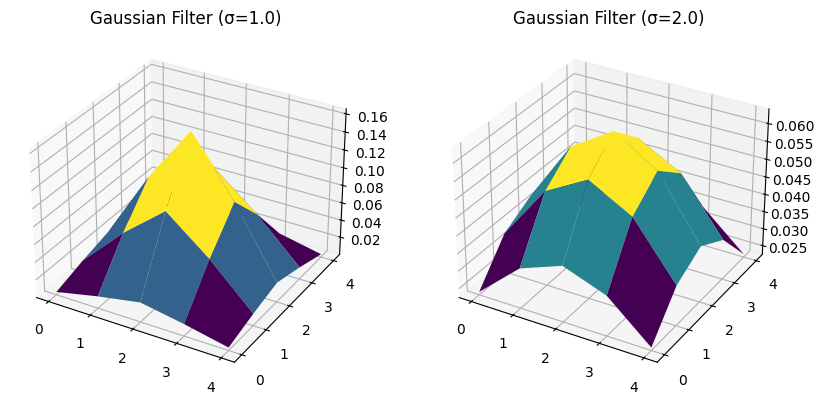

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_gaussian_filter(size, sigma):
    """Create a 2D Gaussian filter."""
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    gauss = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    return gauss / np.sum(gauss)  # Normalize

# Create two filters
filter1 = create_gaussian_filter(5, 1.0)
filter2 = create_gaussian_filter(5, 2.0)

# Visualize the filters as 3D graphs
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(*np.meshgrid(np.arange(5), np.arange(5)), filter1, cmap='viridis')
ax1.set_title('Gaussian Filter (σ=1.0)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(*np.meshgrid(np.arange(5), np.arange(5)), filter2, cmap='viridis')
ax2.set_title('Gaussian Filter (σ=2.0)')

plt.show()


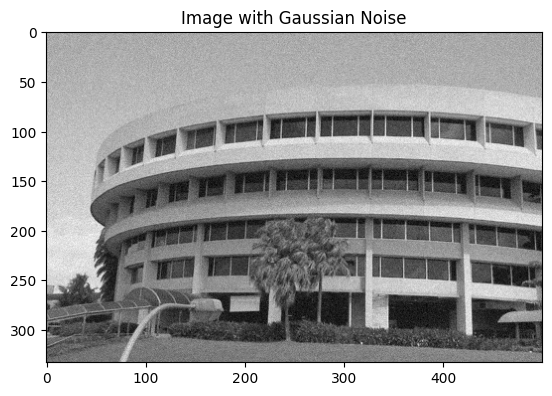

In [17]:
import cv2

# Load the image with Gaussian noise
image_gaussian_noise = cv2.imread('lib-gn.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_gaussian_noise, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.show()


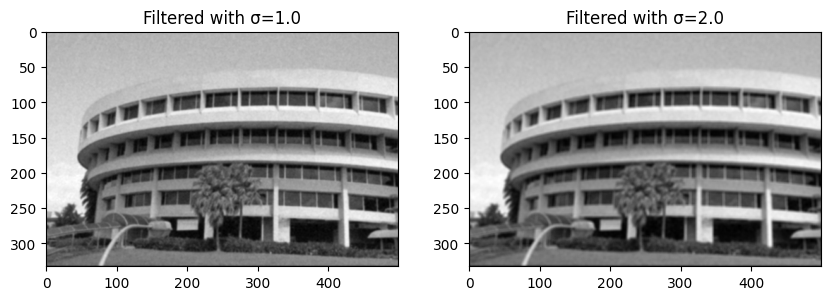

In [18]:
from scipy.signal import convolve2d

# Apply the filters to the image using 2D convolution
smoothed_image1 = convolve2d(image_gaussian_noise, filter1, mode='same')
smoothed_image2 = convolve2d(image_gaussian_noise, filter2, mode='same')

# Display the smoothed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(smoothed_image1, cmap='gray')
plt.title('Filtered with σ=1.0')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image2, cmap='gray')
plt.title('Filtered with σ=2.0')

plt.show()



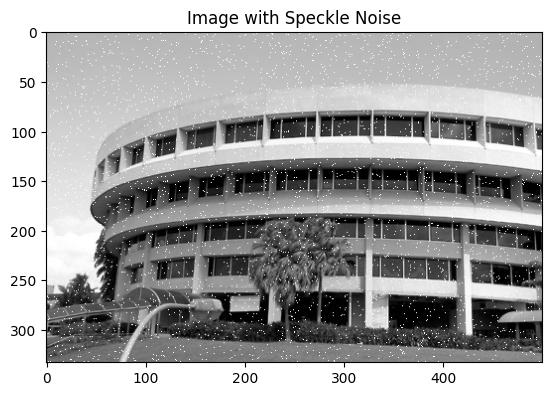

In [19]:
# Load the image with speckle noise
image_speckle_noise = cv2.imread('lib-sp.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_speckle_noise, cmap='gray')
plt.title('Image with Speckle Noise')
plt.show()


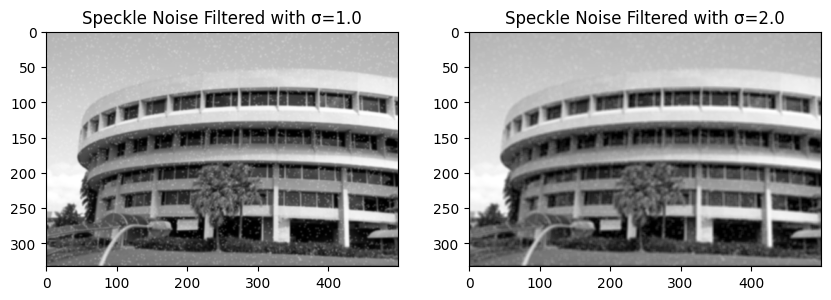

In [20]:
# Apply the filters to the image with speckle noise
smoothed_image1_speckle = convolve2d(image_speckle_noise, filter1, mode='same')
smoothed_image2_speckle = convolve2d(image_speckle_noise, filter2, mode='same')

# Display the smoothed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(smoothed_image1_speckle, cmap='gray')
plt.title('Speckle Noise Filtered with σ=1.0')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image2_speckle, cmap='gray')
plt.title('Speckle Noise Filtered with σ=2.0')

plt.show()


Final Question: Are the filters better at handling Gaussian noise or speckle noise?
Answer:
Gaussian Noise: The Gaussian filter is generally well-suited for reducing Gaussian noise, as both the noise and the filter follow the same distribution pattern. The filtering smooths the random noise effectively.
Speckle Noise: Speckle noise is more difficult to remove with a Gaussian filter. While the filter may reduce some noise, it may not perform as well as it does with Gaussian noise. More specialized filters (like median filters) may be more effective for removing speckle noise.
Summary of Results:
Gaussian Filters: Two Gaussian filters are created (σ = 1.0 and σ = 2.0) to smooth the images.
Noise Reduction: Applying these filters reduces Gaussian noise effectively, but the higher sigma filter (σ = 2.0) blurs the image more.
Speckle Noise: Gaussian filters are less effective at removing speckle noise, as this type of noise is more challenging for simple smoothing filters.


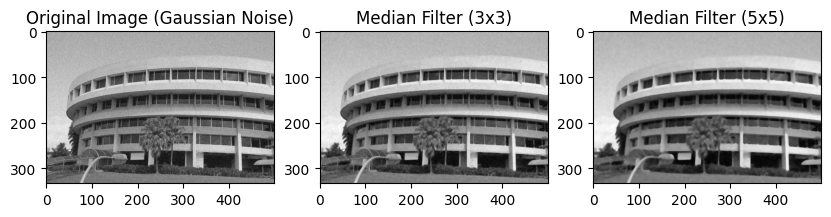

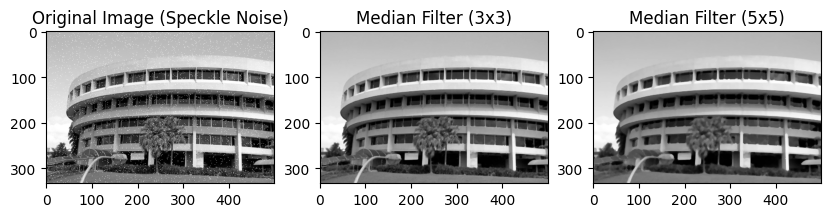

In [40]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load images
image_gaussian_noise = cv2.imread('lib-gn.jpg', cv2.IMREAD_GRAYSCALE)
image_speckle_noise = cv2.imread('lib-sp.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median filtering with 3x3 and 5x5 neighborhoods
median_3x3_gaussian = median_filter(image_gaussian_noise, size=3)
median_5x5_gaussian = median_filter(image_gaussian_noise, size=5)

median_3x3_speckle = median_filter(image_speckle_noise, size=3)
median_5x5_speckle = median_filter(image_speckle_noise, size=5)

# Display the results for the image with Gaussian noise
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gaussian_noise, cmap='gray')
plt.title('Original Image (Gaussian Noise)')

plt.subplot(1, 3, 2)
plt.imshow(median_3x3_gaussian, cmap='gray')
plt.title('Median Filter (3x3)')

plt.subplot(1, 3, 3)
plt.imshow(median_5x5_gaussian, cmap='gray')
plt.title('Median Filter (5x5)')

plt.show()

# Display the results for the image with Speckle noise
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_speckle_noise, cmap='gray')
plt.title('Original Image (Speckle Noise)')

plt.subplot(1, 3, 2)
plt.imshow(median_3x3_speckle, cmap='gray')
plt.title('Median Filter (3x3)')

plt.subplot(1, 3, 3)
plt.imshow(median_5x5_speckle, cmap='gray')
plt.title('Median Filter (5x5)')

plt.show()


Comparing Gaussian Filtering with Median Filtering
Handling Gaussian Noise:
Gaussian filtering:
Gaussian filters are effective at removing Gaussian noise because they smooth out the random variations in pixel intensity that are characteristic of Gaussian noise.
However, they tend to blur the image, especially with larger sigma values.
Median filtering:
Less effective at removing Gaussian noise, because it replaces pixel values based on the median of neighboring intensities, which doesn’t align well with the random, continuous noise patterns of Gaussian noise.
It may preserve edges better but doesn’t smooth out Gaussian noise as well as the Gaussian filter does.
Handling Speckle Noise:
Gaussian filtering:
Gaussian filters are not very effective at handling speckle noise. They smooth the image but do not target the grainy, salt-and-pepper-like patterns of speckle noise.
The smoothing may blur edges and fine details, leading to a loss of important image information.
Median filtering:
Highly effective at removing speckle noise, as it directly targets extreme intensity variations (salt-and-pepper patterns). The median filter replaces these outliers with more representative pixel values.
Median filters preserve edges better than Gaussian filters, making them ideal for speckle noise.
Trade-offs Between Gaussian and Median Filtering:
Gaussian Filtering:

Pros: Effective at reducing Gaussian noise and general smoothing. Works well with continuous noise.
Cons: Can cause blurring of fine details and edges. Less effective against speckle or salt-and-pepper noise.
Median Filtering:

Pros: Preserves edges and fine details. Very effective at removing speckle noise and salt-and-pepper noise.
Cons: Less effective at reducing Gaussian noise. Can introduce "patchy" artifacts in smooth areas with Gaussian noise.

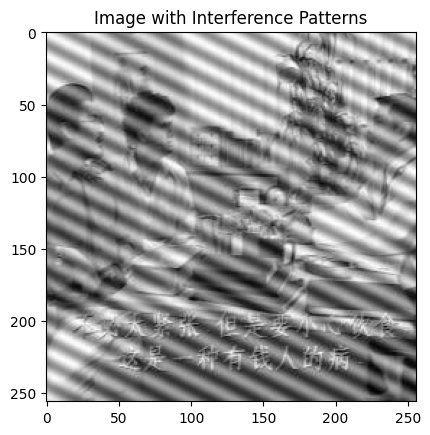

In [42]:
import cv2
import matplotlib.pyplot as plt

# Load and display the image with interference patterns
image = cv2.imread('pck-int.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Image with Interference Patterns')
plt.show()


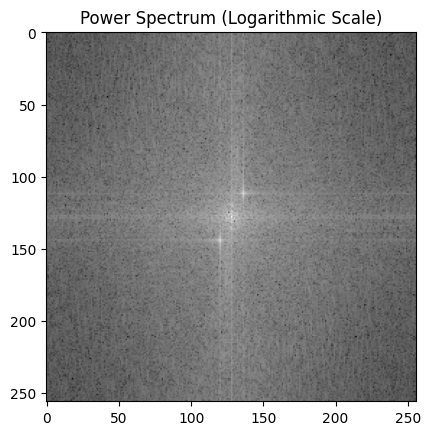

In [45]:
import numpy as np

# Step 1: Fourier Transform
F = np.fft.fft2(image)

# Step 2: Compute the Power Spectrum
S = np.abs(F)**2

# Step 3: Shift the Fourier spectrum to center
S_shifted = np.fft.fftshift(S)

# Display the power spectrum (nonlinearly scaled for better visualization)
plt.imshow(np.log(S_shifted + 1), cmap='grey')
plt.title('Power Spectrum (Logarithmic Scale)')
plt.show()
